In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
pip install split_folders

Note: you may need to restart the kernel to use updated packages.


In [3]:
import split_folders 

ModuleNotFoundError: No module named 'split_folders'

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE=32

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage/',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
CLASS_NAMES = dataset.class_names

In [6]:
CLASS_NAMES

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

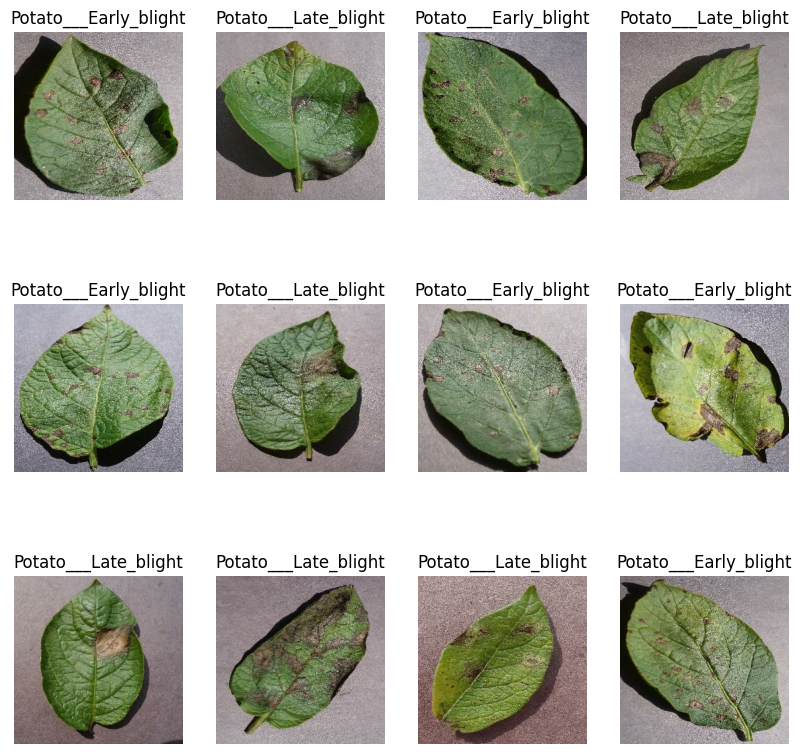

In [7]:
plt.figure(figsize=(10,10))
for Image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.title(CLASS_NAMES[label_batch.numpy()[i]])
        plt.imshow(Image_batch[i].numpy().astype('uint8'))
        plt.axis('off')

In [8]:
len(dataset)

68

In [9]:
def get_train_test_data(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffel1=True,shuffel_size=1000):
    
    ds_size = len(ds)
    if shuffel1:
        ds = ds.shuffle(shuffel_size,seed = 12)
    
    train_size = int(ds_size*train_split)
    val_size = int(ds_size*val_split)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [10]:
train_ds,val_ds,test_ds = get_train_test_data(dataset)

In [11]:
len(train_ds)

54

In [12]:
len(val_ds)

6

In [13]:
len(test_ds)

8

In [14]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [15]:
rescalling_and_resizing = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [16]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [17]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3)

In [39]:
model = tf.keras.models.Sequential([
    rescalling_and_resizing,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPool2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(2,2),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax')
])
model.build(input_shape=input_shape)

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [41]:
model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
)

In [42]:
history = model.fit(train_ds,epochs=50,batch_size=BATCH_SIZE,verbose=1,validation_data=val_ds)

Epoch 1/50


54/54 [==============================] - 11s 164ms/step - loss: 0.9016 - accuracy: 0.4873 - val_loss: 0.7922 - val_accuracy: 0.5573
Epoch 2/50
54/54 [==============================] - 8s 143ms/step - loss: 0.5601 - accuracy: 0.7471 - val_loss: 0.3408 - val_accuracy: 0.8333
Epoch 3/50
54/54 [==============================] - 10s 190ms/step - loss: 0.2643 - accuracy: 0.8976 - val_loss: 0.2644 - val_accuracy: 0.8854
Epoch 4/50
54/54 [==============================] - 9s 174ms/step - loss: 0.2444 - accuracy: 0.9051 - val_loss: 0.2188 - val_accuracy: 0.8958
Epoch 5/50
54/54 [==============================] - 10s 184ms/step - loss: 0.2110 - accuracy: 0.9213 - val_loss: 0.1494 - val_accuracy: 0.9531
Epoch 6/50
54/54 [==============================] - 10s 185ms/step - loss: 0.1474 - accuracy: 0.9473 - val_loss: 0.2701 - val_accuracy: 0.8906
Epoch 7/50
54/54 [==============================] - 10s 182ms/step - loss: 0.1762 - accuracy: 0.9306 - val_loss: 0.1497 - val_accuracy: 0.9427
Epoch 8/50
5

In [43]:
model_version = 1
model.save(f"saved_model/{model_version}")

INFO:tensorflow:Assets written to: saved_model/1\assets


INFO:tensorflow:Assets written to: saved_model/1\assets


In [44]:
import joblib
joblib.dump(model,'model.joblib')

INFO:tensorflow:Assets written to: ram://1b5bd71a-ff48-40cb-adb3-d8be59ae5ee0/assets


INFO:tensorflow:Assets written to: ram://1b5bd71a-ff48-40cb-adb3-d8be59ae5ee0/assets


['model.joblib']

In [45]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

INFO:tensorflow:Assets written to: ram://03d16942-9572-44a2-96f7-4a5bd4edfa4b/assets


INFO:tensorflow:Assets written to: ram://03d16942-9572-44a2-96f7-4a5bd4edfa4b/assets


In [47]:

history1=np.load('history1.npy',allow_pickle='TRUE').item()


In [48]:
history1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [49]:
model.save('poteto_prediction_new.h5')

In [50]:
model.evaluate(test_ds)

8/8 [==============================] - 1s 22ms/step - loss: 0.0466 - accuracy: 0.9883


[0.04664234444499016, 0.98828125]

In [51]:
import pickle
import numpy as np

In [52]:
np.save('history1.npy',history)

INFO:tensorflow:Assets written to: ram://0c431f3a-7666-48c3-a1eb-5f99d39be28c/assets


INFO:tensorflow:Assets written to: ram://0c431f3a-7666-48c3-a1eb-5f99d39be28c/assets


In [53]:
model.evaluate(test_ds)

8/8 [==============================] - 0s 21ms/step - loss: 0.0466 - accuracy: 0.9883


[0.04664234071969986, 0.98828125]

In [54]:
p = model.predict(train_ds.take(1))

1/1 [==============================] - 0s 157ms/step


In [55]:
CLASS_NAMES[np.argmax(p[0])]

'Potato___Late_blight'

In [56]:
model.predict(train_ds)

54/54 [==============================] - 1s 24ms/step


array([[2.3336322e-03, 9.9766636e-01, 1.3508323e-25],
       [1.0000000e+00, 8.7948671e-10, 5.3116902e-38],
       [9.8819081e-03, 9.9011809e-01, 5.2518712e-20],
       ...,
       [6.8986751e-08, 9.9999988e-01, 4.9667879e-08],
       [5.4716618e-09, 1.0000000e+00, 2.8245249e-14],
       [1.0000000e+00, 4.3361181e-16, 0.0000000e+00]], dtype=float32)

In [57]:
history1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [58]:
loss = history1['loss']
val_loss = history1['val_loss']
accuracy = history1['accuracy']
val_accuracy = history1['val_accuracy']

Text(0.5, 1.0, 'training and validation accuracy')

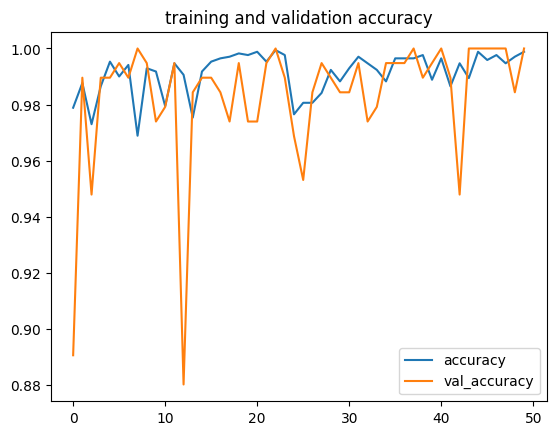

In [59]:
plt.plot(range(50),accuracy,label='accuracy')
plt.plot(range(50),val_accuracy,label='val_accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

Text(0.5, 1.0, 'training and validation loss')

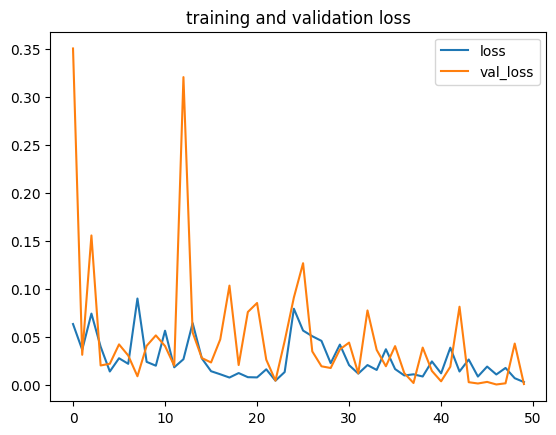

In [60]:
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.legend(loc='upper right')
plt.title('training and validation loss')

In [61]:
train_ds.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [62]:
CLASS_NAMES


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

_________Model loaded successfully____________.
________________ready to predict________________________________
1/1 [==============================] - 0s 120ms/step
Predictions: [1.0000000e+00 4.7453027e-12 0.0000000e+00]
['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
Potato___Early_blight 100.0


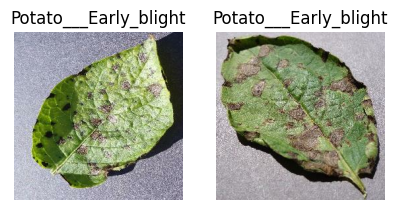

In [63]:
plt.figure(figsize=(10,10))
for Image_batch, label_batch in train_ds.take(1):
    for i in range(2):
        plt.subplot(3,4,i+1)
        plt.title(CLASS_NAMES[label_batch.numpy()[i]])
        plt.imshow(Image_batch[i].numpy().astype('uint8'))
        plt.axis('off')

model = tf.keras.models.load_model('poteto_prediction_new.h5')
    # print(model.summery())
print('_________Model loaded successfully____________.')

# image = request.files["file"]

image = train_ds.take(1)

# image = image / 255  # normalize the image in 0 to 1 range

# img_array = tf.expand_dims(image, 0)
print('________________ready to predict________________________________')
predictions = model.predict(image)[0]

print("Predictions:", predictions)
print(CLASS_NAMES)
predicted_class = CLASS_NAMES[np.argmax(predictions)]
confidence = round(100 * (np.max(predictions)), 2)

print(predicted_class,confidence)